## Step 5 - Evaluate Model - Task 2. Evaluate Classification Model 


###Load Libraries


In [1]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [2]:
import pandas as pd
import numpy as np

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Set up environment and connect to Google Drive

In [5]:
using_Google_colab = True
using_Anaconda_on_Mac_or_Linux = False
using_Anaconda_on_windows = False

In [6]:
if using_Google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


## EM2.1 Open Notebook, upload the interim pre-processed data from step 5 for LA county - Activity 1


### Upload intermediate classification modeling data for LA County
(see Step-4-Develop-Model-Task-4-Classification notebook for details)

In [7]:
if using_Google_colab:
  merged_LA = pd.read_csv('/content/drive/MyDrive/COVID_Project/output/merged_LA.csv')
if using_Anaconda_on_Mac_or_Linux:
  merged_LA = pd.read_csv('../output/merged_LA.csv')
if using_Anaconda_on_windows:
  merged_LA = pd.read_csv(r'..\output\merged_LA.csv')
merged_LA

,Unnamed: 0,countyFIPS,Date,Incremental Cases,population,Month,Case Change,retail_recreation,grocery_pharmacy,parks,transit,workplaces,residential,Original Month,delta_retail_recreation,delta_grocery_pharmacy,delta_parks,delta_transit,delta_workplaces,delta_residential,case_direction
0,2,6037,2020-04-30,672.366667,10039107,2020-04-30,575.269892,-21.064516,-1.806452,-19.903226,-27.483871,-21.483871,10.935484,2020-03-31,-23.131183,-2.473118,-31.836559,-27.417204,-21.150538,10.935484,1
1,3,6037,2020-05-31,1026.258065,10039107,2020-05-31,353.891398,-51.766667,-22.066667,-44.900000,-52.600000,-48.566667,22.166667,2020-04-30,-30.702151,-20.260215,-24.996774,-25.116129,-27.082796,11.231183,1
2,4,6037,2020-06-30,1617.766667,10039107,2020-06-30,591.508602,-45.741935,-12.096774,-18.806452,-43.967742,-40.709677,17.580645,2020-05-31,6.024731,9.969892,26.093548,8.632258,7.856989,-4.586022,1
3,5,6037,2020-07-31,2740.387097,10039107,2020-07-31,1122.620430,-34.033333,-10.466667,-8.866667,-38.533333,-34.500000,13.833333,2020-06-30,11.708602,1.630108,9.939785,5.434409,6.209677,-3.747312,1
4,6,6037,2020-08-31,1718.935484,10039107,2020-08-31,-1021.451613,-32.096774,-10.483871,-6.935484,-40.096774,-37.580645,13.677419,2020-07-31,1.936559,-0.017204,1.931183,-1.563441,-3.080645,-0.155914,-1
5,7,6037,2020-09-30,951.033333,10039107,2020-09-30,-767.902151,-31.290323,-12.129032,-7.516129,-38.967742,-35.322581,12.129032,2020-08-31,0.806452,-1.645161,-0.580645,1.129032,2.258065,-1.548387,-1
6,8,6037,2020-10-31,1203.838710,10039107,2020-10-31,252.805376,-30.500000,-13.533333,-16.766667,-40.166667,-35.900000,12.066667,2020-09-30,0.790323,-1.404301,-9.250538,-1.198925,-0.577419,-0.062366,1
7,9,6037,2020-11-30,3110.033333,10039107,2020-11-30,1906.194624,-29.677419,-12.806452,-19.709677,-36.709677,-32.290323,11.129032,2020-10-31,0.822581,0.726882,-2.943011,3.456989,3.609677,-0.937634,1
8,10,6037,2020-12-31,11137.550000,10039107,2020-12-31,8027.516667,-31.300000,-13.933333,-27.733333,-42.300000,-34.866667,12.600000,2020-11-30,-1.622581,-1.126882,-8.023656,-5.590323,-2.576344,1.470968,1


### Prepare and apply the model


In [8]:
y_LA = merged_LA['case_direction'].values
X_LA = merged_LA[['delta_retail_recreation', 
               'delta_grocery_pharmacy', 
               'delta_parks', 
               'delta_transit', 
               'delta_workplaces', 
               'delta_residential']].values
X_LA

array([[-2.31311828e+01, -2.47311828e+00, -3.18365591e+01,
        -2.74172043e+01, -2.11505376e+01,  1.09354839e+01],
       [-3.07021505e+01, -2.02602151e+01, -2.49967742e+01,
        -2.51161290e+01, -2.70827957e+01,  1.12311828e+01],
       [ 6.02473118e+00,  9.96989247e+00,  2.60935484e+01,
         8.63225806e+00,  7.85698925e+00, -4.58602151e+00],
       [ 1.17086022e+01,  1.63010753e+00,  9.93978495e+00,
         5.43440860e+00,  6.20967742e+00, -3.74731183e+00],
       [ 1.93655914e+00, -1.72043011e-02,  1.93118280e+00,
        -1.56344086e+00, -3.08064516e+00, -1.55913978e-01],
       [ 8.06451613e-01, -1.64516129e+00, -5.80645161e-01,
         1.12903226e+00,  2.25806452e+00, -1.54838710e+00],
       [ 7.90322581e-01, -1.40430108e+00, -9.25053763e+00,
        -1.19892473e+00, -5.77419355e-01, -6.23655914e-02],
       [ 8.22580645e-01,  7.26881720e-01, -2.94301075e+00,
         3.45698925e+00,  3.60967742e+00, -9.37634409e-01],
       [-1.62258065e+00, -1.12688172e+00, -8.023

In [ ]:
y_LA

array([ 1,  1,  1,  1, -1, -1,  1,  1,  1])

## EM2.2 Divide data into train and test, develop and test the model


In [9]:
decision_tree = DecisionTreeClassifier()
X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(X_LA, 
                                                                y_LA, 
                                                                test_size=0.2, 
                                                                random_state=0)
model_LA = decision_tree.fit(X_train_LA, y_train_LA)

In [ ]:
X_train_LA

array([[-3.07021505e+01, -2.02602151e+01, -2.49967742e+01,
        -2.51161290e+01, -2.70827957e+01,  1.12311828e+01],
       [ 1.93655914e+00, -1.72043011e-02,  1.93118280e+00,
        -1.56344086e+00, -3.08064516e+00, -1.55913978e-01],
       [-1.62258065e+00, -1.12688172e+00, -8.02365591e+00,
        -5.59032258e+00, -2.57634409e+00,  1.47096774e+00],
       [ 7.90322581e-01, -1.40430108e+00, -9.25053763e+00,
        -1.19892473e+00, -5.77419355e-01, -6.23655914e-02],
       [ 1.17086022e+01,  1.63010753e+00,  9.93978495e+00,
         5.43440860e+00,  6.20967742e+00, -3.74731183e+00],
       [-2.31311828e+01, -2.47311828e+00, -3.18365591e+01,
        -2.74172043e+01, -2.11505376e+01,  1.09354839e+01],
       [ 8.06451613e-01, -1.64516129e+00, -5.80645161e-01,
         1.12903226e+00,  2.25806452e+00, -1.54838710e+00]])

In [ ]:
y_train_LA

array([ 1, -1,  1,  1,  1,  1, -1])

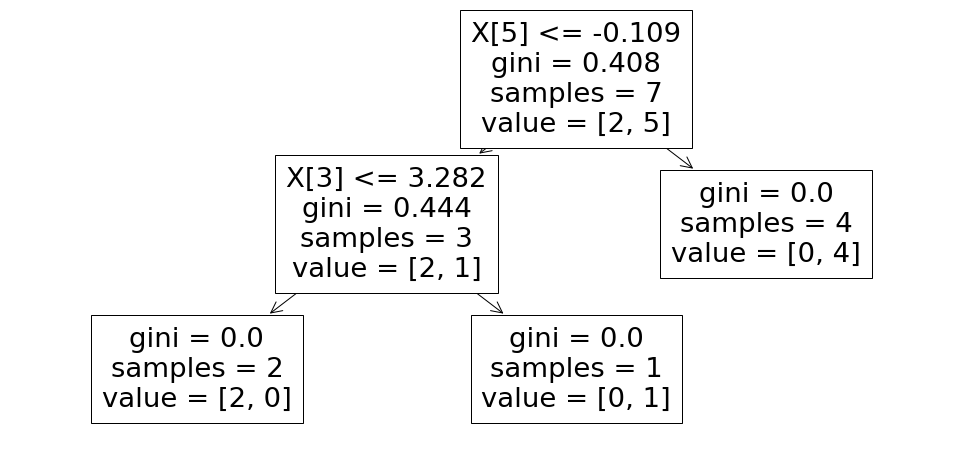

In [10]:
 plt.figure(figsize=(17,8))
 tree.plot_tree(model_LA, max_depth=2)
 plt.show()

In [11]:
print(decision_tree.feature_importances_)

[0.         0.         0.         0.46666667 0.         0.53333333]


In [12]:
y_predict_LA = decision_tree.predict(X_test_LA)
y_predict_LA

array([1, 1])

In [13]:
y_test_LA

array([1, 1])

In [14]:

accuracy_score(y_test_LA, y_predict_LA)

1.0

## EM2.3 Load all county Data

In [15]:
if using_Google_colab:
  merged_all = pd.read_csv('/content/drive/MyDrive/COVID_Project/output/merged_all.csv')
if using_Anaconda_on_Mac_or_Linux:
  merged_all = pd.read_csv('../output/merged_all.csv')
if using_Anaconda_on_windows:
  merged_all = pd.read_csv(r'..\output\merged_all.csv')
merged_all

,Unnamed: 0,countyFIPS,Date,Incremental Cases,population,Month,Case Change,retail_recreation,grocery_pharmacy,parks,transit,workplaces,residential,Original Month,delta_retail_recreation,delta_grocery_pharmacy,delta_parks,delta_transit,delta_workplaces,delta_residential,case_direction
0,0,1001,2020-02-29,0.000000,55869,2020-02-29,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2020-01-31,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-1
1,1,1001,2020-03-31,0.225806,55869,2020-03-31,0.225806,4.733333,2.533333,-23.0,0.0,0.266667,0.200000,2020-02-29,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1
2,2,1001,2020-04-30,1.166667,55869,2020-04-30,0.940860,-6.354839,12.612903,-14.0,0.0,-13.419355,6.090909,2020-03-31,-11.088172,10.079570,9.0,0.0,-13.686022,5.890909,1
3,3,1001,2020-05-31,5.741935,55869,2020-05-31,4.575269,-25.700000,4.033333,-49.5,0.0,-37.833333,15.863636,2020-04-30,-19.345161,-8.579570,-35.5,0.0,-24.413978,9.772727,1
4,4,1001,2020-06-30,10.566667,55869,2020-06-30,4.824731,-3.677419,13.548387,0.0,0.0,-27.451613,10.850000,2020-05-31,22.022581,9.515054,0.0,0.0,10.381720,-5.013636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34579,34579,56045,2020-08-31,0.451613,6927,2020-08-31,0.354839,0.000000,0.000000,0.0,0.0,-25.565217,0.000000,2020-07-31,0.000000,0.000000,0.0,0.0,-0.837945,0.000000,1
34580,34580,56045,2020-09-30,0.666667,6927,2020-09-30,0.215054,0.000000,0.000000,0.0,0.0,-23.200000,0.000000,2020-08-31,0.000000,0.000000,0.0,0.0,2.365217,0.000000,1
34581,34581,56045,2020-10-31,3.870968,6927,2020-10-31,3.204301,0.000000,0.000000,0.0,0.0,-14.000000,0.000000,2020-09-30,0.000000,0.000000,0.0,0.0,9.200000,0.000000,1
34582,34582,56045,2020-11-30,7.933333,6927,2020-11-30,4.062366,0.000000,0.000000,0.0,0.0,-13.272727,0.000000,2020-10-31,0.000000,0.000000,0.0,0.0,0.727273,0.000000,1


### Prepare and apply the model to all counties data

In [16]:
y_all = merged_all['case_direction'].values
X_all = merged_all[['delta_retail_recreation', 
                    'delta_grocery_pharmacy', 
                    'delta_parks', 
                    'delta_transit', 
                    'delta_workplaces', 
                    'delta_residential']].values
X_all.shape

(34584, 6)

In [17]:
y_all.shape

(34584,)

In [18]:
decision_tree_all = DecisionTreeClassifier()
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
model_all = decision_tree_all.fit(X_train_all, y_train_all)

In [19]:
X_train_all.shape

(27667, 6)

In [20]:
X_test_all.shape

(6917, 6)

In [21]:
print(decision_tree_all.feature_importances_)

[0.14113612 0.14131572 0.05663455 0.08411799 0.46780035 0.10899527]


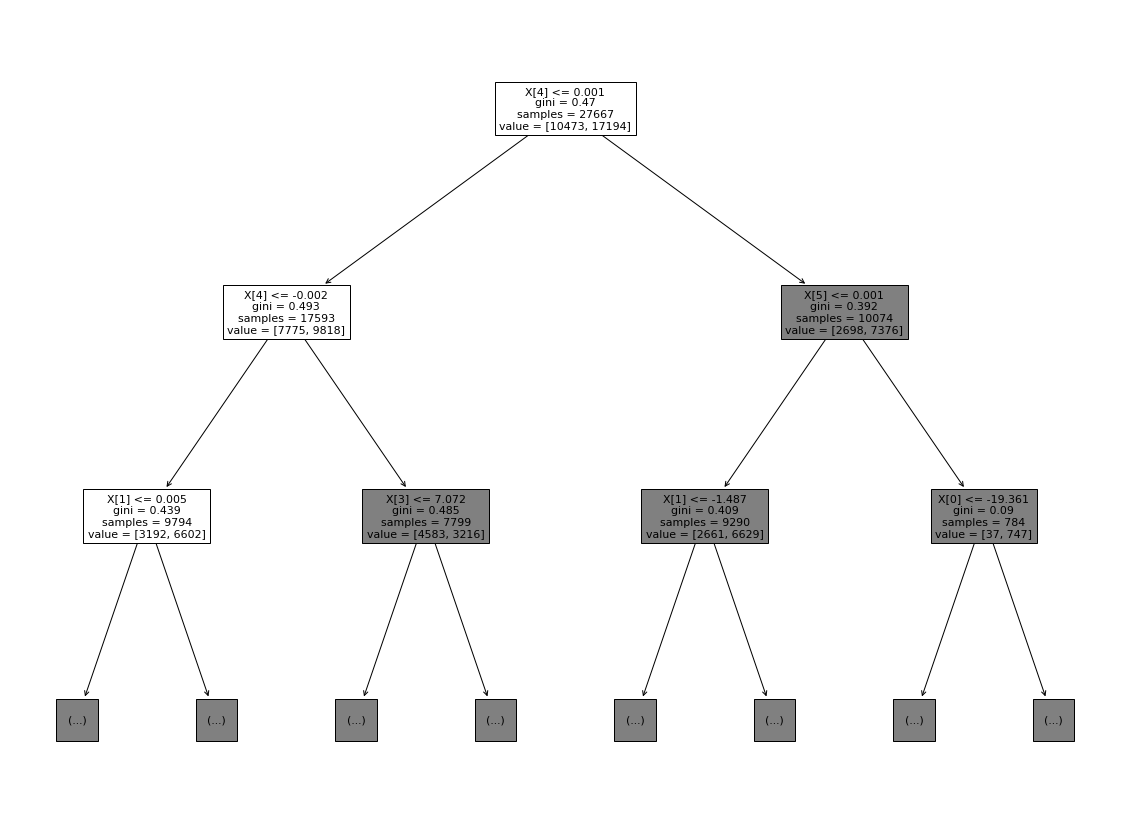

In [22]:
plt.figure(figsize=(20,15))
tree.plot_tree(model_all, max_depth=2)
plt.show()

In [23]:
y_predict_all = decision_tree_all.predict(X_test_all)
accuracy_score(y_test_all, y_predict_all)

0.6151510770565274

### Compute Confusion_matrix

## EM2.4 Test the model and compute confusion matrix, precision and recall

In [24]:
pd.DataFrame(
    confusion_matrix(y_test_all, y_predict_all),
    columns=['Predicted Not increase', 'Predicted Increase'],
    index=['True Not Increase', 'True Increase'])

,Predicted Not increase,Predicted Increase
True Not Increase,1688,891
True Increase,1771,2567


In [25]:
average_precision = precision_score(y_test_all, y_predict_all)
average_precision

0.7423366107576634

In [26]:
recall_score(y_test_all, y_predict_all)

0.5917473490087598